I had a "miraculous" result, just making up my own portfolio intuitively, 
and somehow it beat out the other portfolios, looking like a competitor to GoldenButterfly:
 - 30% TSM
 - 20% SCV
 - 20% STT
 - 20% REIT
 - 10% GLD
 
This notebook repeats the previous version, except adds some constraints to the possible portfolios:
- No LTT
- No more than 20% Gold
- SCV can't exceed TSM percentage

In [21]:
import pandas as pd
import sqlite3
import seaborn as sns

# Read sqlite query results into a pandas DataFrame
def query(query):
    con = sqlite3.connect("output/portfolios_varying_percentages.sqlite")
    df = pd.read_sql_query(query, con)
    con.close()
    return df

In [22]:
p1 = query("SELECT COUNT(*) AS c FROM portfolios")['c'][0]
print("portfolios:", p1)

portfolios: 4320


4320


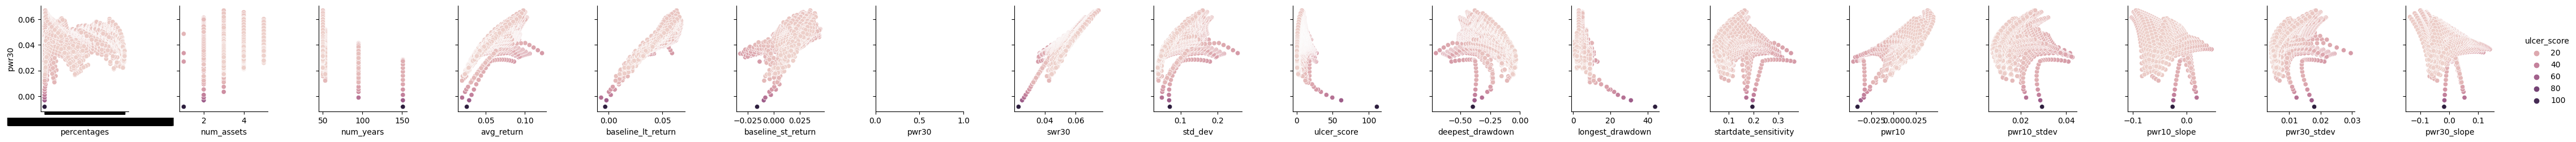

In [23]:
# get a sense of the shape of the graphs (ran with percentages in 5% steps)
df = query("""
  SELECT * FROM portfolios
  ORDER BY ulcer_score DESC
""")
print(df['assets'].size)
sns.pairplot(df, y_vars=['pwr30'], x_vars=df.columns.values[1:], hue='ulcer_score')

3078


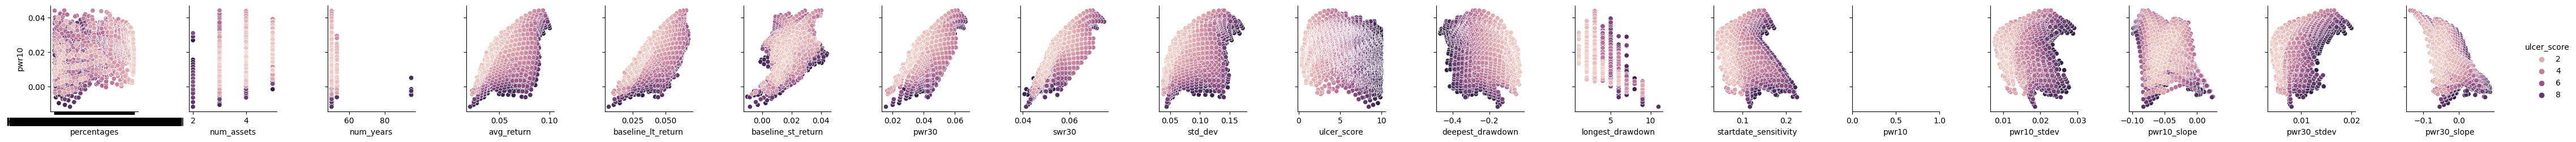

In [24]:
# tighten: ulcer_score
# change graph y-axis: pwr10
df = query("""
  SELECT * FROM portfolios
  WHERE ulcer_score < 10
  ORDER BY ulcer_score DESC
""")
print(df['assets'].size)
sns.pairplot(df, y_vars=['pwr10'], x_vars=df.columns.values[1:], hue='ulcer_score')

1785


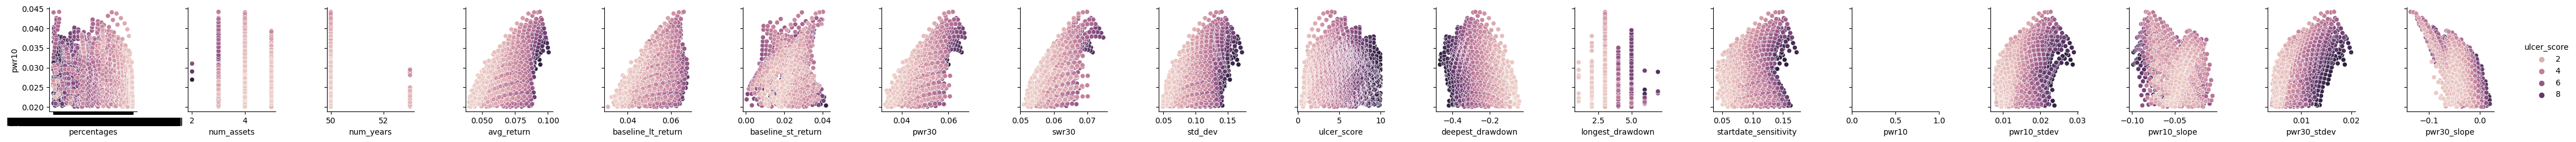

In [25]:
# tighten: pwr10
df = query("""
  SELECT * FROM portfolios
  WHERE ulcer_score < 10
    AND pwr10 > 0.02
  ORDER BY ulcer_score DESC
""")
print(df['assets'].size)
sns.pairplot(df, y_vars=['pwr10'], x_vars=df.columns.values[1:], hue='ulcer_score')

943


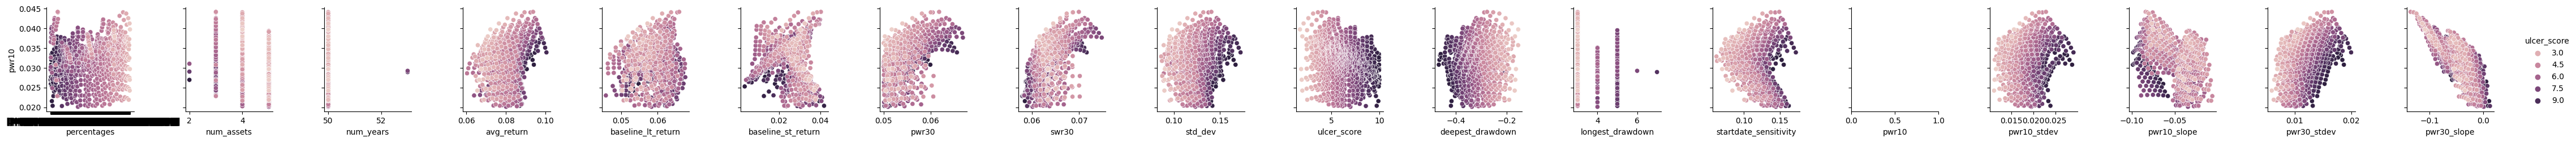

In [26]:
# tighten: pwr30
df = query("""
  SELECT * FROM portfolios
  WHERE ulcer_score < 10
    AND pwr10 > 0.02
    AND pwr30 > 0.05
  ORDER BY ulcer_score DESC
""")
print(df['assets'].size)
sns.pairplot(df, y_vars=['pwr10'], x_vars=df.columns.values[1:], hue='ulcer_score')

113


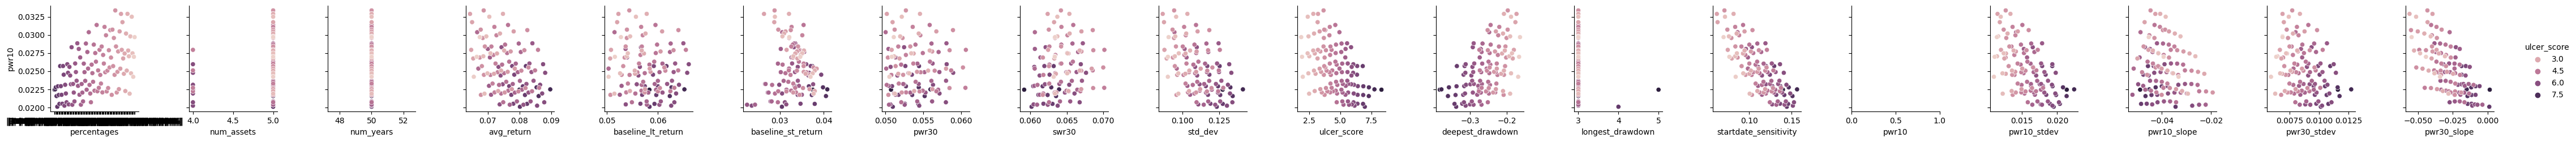

In [28]:
# Repeat the above, but updated database to exclude SCV if TSM wasn't included
# tighten: pwr30
df = query("""
  SELECT * FROM portfolios
  WHERE ulcer_score < 10
    AND pwr10 > 0.02
    AND pwr30 > 0.05
  ORDER BY ulcer_score DESC
""")
print(df['assets'].size)
sns.pairplot(df, y_vars=['pwr10'], x_vars=df.columns.values[1:], hue='ulcer_score')